In [ ]:
import os

assert os.environ["CONDA_DEFAULT_ENV"]=='chronos'

In [2]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


## TODO
* get (B-V)_0, R'_HK, LiEW  from vizier
* estimate from Mamajek table?

In [7]:
t = cr.Target(toiid=179)

Target: TOI 179


In [10]:
bv = t.query_vizier_param("B-V")
bv

Found 9 references in Vizier with `B-V`.


{'I/239/hip_main': 0.876,
 'I/239/tyc_main': 0.908,
 'I/311/hip2': 0.876,
 'II/336/apass9': masked,
 'V/145/sky2kv5': 0.908,
 'J/A+A/531/A8/table4': 0.876,
 'J/A+A/537/A147/table4': 0.876,
 'J/A+A/616/A108/catalog': 0.876,
 'J/MNRAS/336/879/table3': 0.88}

In [26]:
import numpy as np

bv_mean, bv_sig = np.nanmean(list(bv.values())), np.nanstd(list(bv.values()))
print(f"{bv_mean:.4f}, {bv_sig:.4f}")

0.8845, 0.0136


In [11]:
r_hk = t.query_vizier_param("log_R_HK_")
r_hk

Found 2 references in Vizier with `log_R_HK_`.


{'J/A+A/531/A8/table4': -4.39, 'J/A+A/537/A147/table4': -4.398}

In [28]:
r_hk_mean = np.nanmean(list(r_hk.values()))
print(f"{r_hk_mean:.4f}")

-4.3940


## get BAFFLES posteriors

In [1]:
import os
os.chdir("/home/jp/github/research/transit/BAFFLES/")
from baffles import *

In [2]:
bv, bv_err = 0.8845, 0.0136 
rhk = -4.3940
li, li_err = 41, 7

Ca Median Age: 601 Myr, 68% CI: 253 - 2.03e+03 Myr, 95% CI: 87.6 - 7.34e+03 Myr
Li Median Age: 367 Myr, 68% CI: 273 - 437 Myr, 95% CI:         98.9 - 596 Myr
Final Median Age: 366 Myr, 68% CI: 286 - 430, 95% CI: 145 - 556


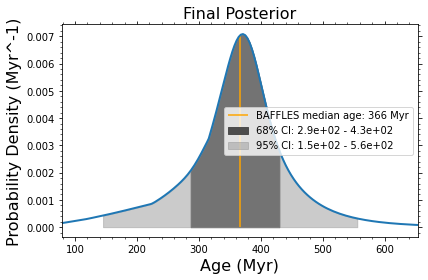

In [3]:
res = baffles_age(bv,rhk,li,bv_err,li_err,
            upperLim=False,
            maxAge=None,
            fileName='baffles',
            showPlots=False,
            savePlots=False, 
            savePostAsText=False
           )

[========================>] 100% ETA: 0:00:00
Finished 23 stars. Average time per star: 0.16 seconds.
Isochronal age exists within 61.298148 % CI


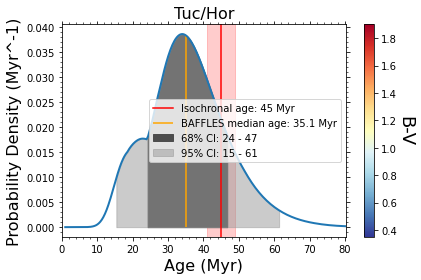

In [29]:
import readData
# Exmple 4: Lets compute a posterior product and save it as a pdf
tuchor_bmv, tuchor_li,tuchor_li_err = readData.tuchor()
baffles_li = age_estimator('lithium')
# pp = PdfPages("tuchor_example_product.pdf")
product = baffles_li.posterior_product(tuchor_bmv,
                                       tuchor_li,
                                       bv_errs=None,
                                       measure_err_arr=tuchor_li_err,
                                       showPlot=True,
                                       #showStars=True, 
                                       title='Tuc/Hor', 
                                       givenAge=45,
                                       givenErr=4)

## stardate?

In [30]:
t.query_vizier_param("Prot")

Found 1 references in Vizier with `Prot`.


{'J/AJ/155/39/table6': 8.69263}

In [6]:
df = cr.utils.get_mamajek_table()
df

Loaded: /home/jp/github/research/project/chronos/chronos/data/mamajek_table.csv


,#SpT,Teff,logT,logL,Mbol,BCv,Mv,B-V,Bt-Vt,G-V,...,Ks-W1,W1-W2,W1-W3,W1-W4,M_J,M_Ks,i-z,z-Y,R_Rsun,Msun
0,O3V,46000.0,4.663,5.80,-9.75,-4.05,-5.7,-0.32,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.500,NaN
1,O4V,43000.0,4.633,5.67,-9.42,-3.92,-5.5,-0.32,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.300,NaN
2,O5V,41500.0,4.618,5.58,-9.20,-3.77,-5.4,-0.32,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.900,NaN
3,O5.5V,40000.0,4.602,5.46,-8.90,-3.65,-5.2,-0.32,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.200,NaN
4,O6V,39000.0,4.591,5.37,-8.67,-3.57,-5.1,-0.32,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Y0V,420.0,2.623,-6.52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.4,NaN,NaN,21.0,NaN,NaN,NaN,0.104,NaN
120,Y0.5V,390.0,2.591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.5,NaN,NaN,22.0,21.5,NaN,NaN,NaN,NaN
121,Y1V,350.0,2.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.6,NaN,NaN,23.0,23.0,NaN,NaN,NaN,NaN
122,Y1.5V,325.0,2.512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.0,23.5,NaN,NaN,NaN,NaN
